## Name: Rupanjana Chakraborty
## Rollno: 25CL05008

* ### Plotting the time series of a given function, X=1.5*sin(2*pi*t/12)+0.8*Cos(2*pi*t/48):

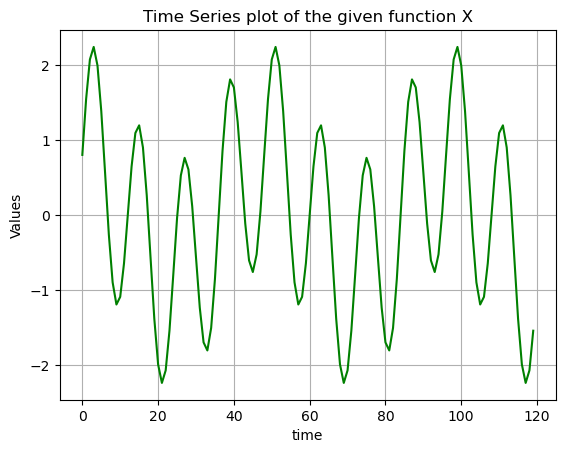

In [116]:
import numpy as np
import matplotlib.pyplot as plt
p=np.pi
t=np.arange(120)
X=1.5*np.sin(2*p*t/12)+0.8*np.cos(2*p*t/48)
#X=np.zeros([120,1])
#i=0
#while i<120:
 #   X[i]=1.5*np.sin(2*p*t[i]/12)+0.8*np.cos(2*p*t[i]/48)
  #  i+=1
plt.plot(t,X, color='green')
plt.xlabel('time')
plt.ylabel('Values')
plt.grid(True)
plt.title('Time Series plot of the given function X')
plt.show()

* ### Fourier Transformation of the function X:

C:\Users\user\AppData\Local\Temp\ipykernel_2080\2943118483.py:5: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/f[:n//2],np.abs(Y[:n//2]),color='blue')


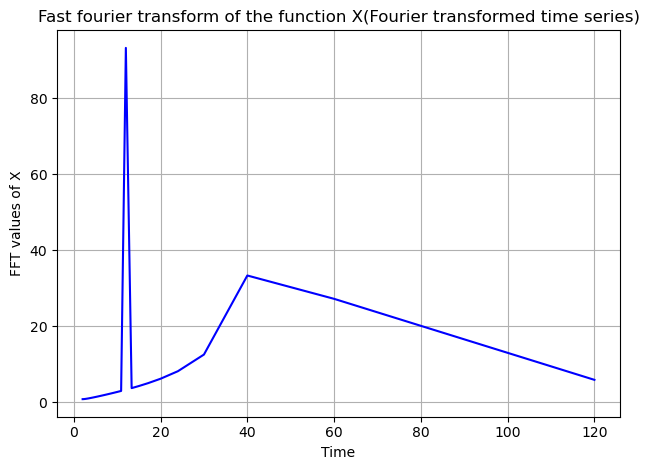

In [120]:
n=120
f=np.fft.fftfreq(120,d=1)
Y=np.fft.fft(X)
Power=np.abs(Y)**2
plt.plot(1/f[:n//2],np.abs(Y[:n//2]),color='blue')
plt.title('Fast fourier transform of the function X(Fourier transformed time series)')
plt.xlabel('Time')
plt.ylabel('FFT values of X')
plt.grid(True)
plt.tight_layout()
plt.show()

* ### SST data of Nino3.4 region:

In [69]:
import xarray as xr
Data=xr.open_dataset("C:/Users/user/Desktop/25cl05008CDA/HadISST_sst.nc.gz")
SST_data=Data["sst"]
Nino34=SST_data.sel(latitude=slice(5.0,-5.0),longitude=slice(-170.0,-120.0))
Nino34_avg=Nino34.mean(dim=['latitude','longitude'])
(Nino34_avg)

<xarray.DataArray 'sst' (time: 1868)> Size: 7kB
array([25.53982 , 25.541965, 26.419277, ..., 27.669348, 27.159168,
       26.725466], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 15kB 1870-01-16T11:59:59.505615234 ... 202...

* ### Fourier Transformed plot of Nino3.4 Region:

C:\Users\user\AppData\Local\Temp\ipykernel_2080\775775360.py:4: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/f1[:1868//2],np.abs(Y1[:1868//2]),color='purple',label='FFT_Series of Nino 3.4 Region')


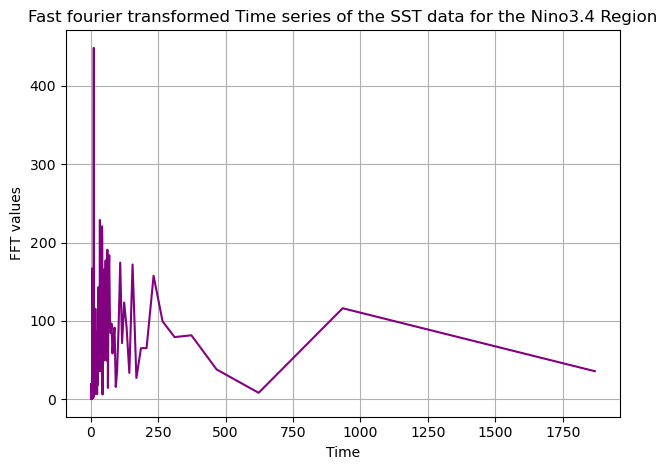

In [132]:
f1=np.fft.fftfreq(1868,d=1)
Y1=np.fft.fft(Nino34_avg)
P=np.abs(Y1)**2
plt.plot(1/f1[:1868//2],np.abs(Y1[:1868//2]),color='purple',label='FFT_Series of Nino 3.4 Region')
#plt.xlim(0,200)
plt.title('Fast fourier transformed Time series of the SST data for the Nino3.4 Region')
plt.xlabel('Time')
plt.ylabel('FFT values')
plt.grid(True)
plt.tight_layout()
plt.show()

* ### Logarithmic plot of the above Fourier Transformed Nino3.4 region plot:

C:\Users\user\AppData\Local\Temp\ipykernel_2080\2272483201.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(np.log(1/f1[:1868//2]),np.log(np.abs(Y1[:1868//2])),color='orange',label='FFT_Logarithmic_Series of Nino 3.4 Region')


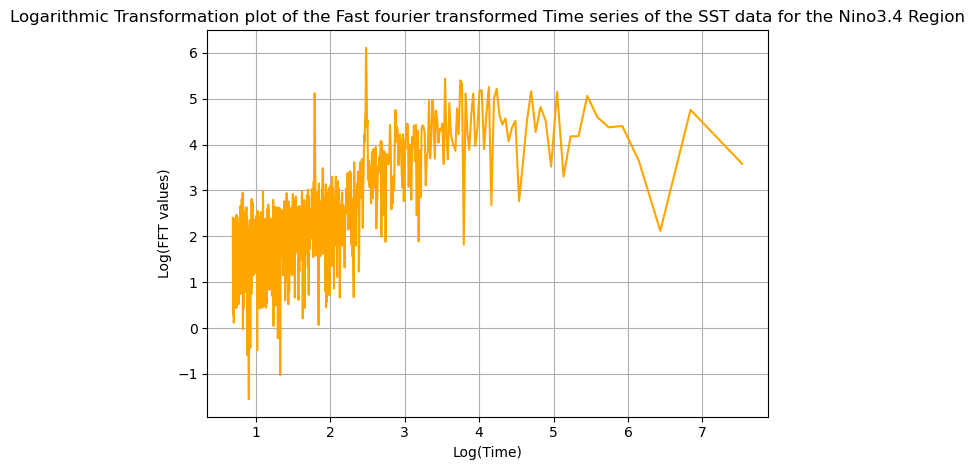

In [133]:
plt.plot(np.log(1/f1[:1868//2]),np.log(np.abs(Y1[:1868//2])),color='orange',label='FFT_Logarithmic_Series of Nino 3.4 Region')
plt.title('Logarithmic Transformation plot of the Fast fourier transformed Time series of the SST data for the Nino3.4 Region')
plt.xlabel('Log(Time)')
plt.ylabel('Log(FFT values)')
plt.grid(True)
plt.tight_layout()
plt.show()

* ### Calculating Climatology of Nino3.4 Region:

In [ ]:
climatology=Nino34_avg.groupby('time.month').mean(dim='time')
(climatology)

* ### Sorting Nino3.4 Region SST data into months:

In [98]:
Nino34_monthly=Nino34_avg.groupby('time.month')
(Nino34_monthly)

DataArrayGroupBy, grouped over 'month'
12 groups with labels 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12.

* ### Calculating the Anomaly:

In [101]:
anomaly=Nino34_monthly-climatology
(anomaly)

<xarray.DataArray 'sst' (time: 1868)> Size: 7kB
array([-0.95141983, -1.1441078 , -0.71008873, ...,  0.10482025,
        0.08828354, -0.01506233], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 15kB 1870-01-16T11:59:59.505615234 ... 202...
    month    (time) int64 15kB 1 2 3 4 5 6 7 8 9 10 11 ... 11 12 1 2 3 4 5 6 7 8

* ### Anomaly plotting of the SST data for the Nino3.4 Region:

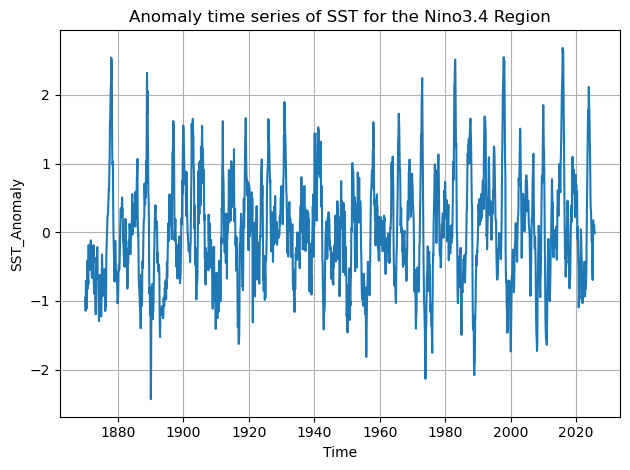

In [113]:
anomaly.plot()
plt.title('Anomaly time series of SST for the Nino3.4 Region')
plt.xlabel('Time')
plt.ylabel('SST_Anomaly')
plt.grid(True)
plt.tight_layout()
plt.show()

* ### Fourier transform of the anomaly plot:

C:\Users\user\AppData\Local\Temp\ipykernel_2080\264017071.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/f1[:1868//2],np.abs(Y2[:1868//2]),color='blue',label='FFT_Anomaly_Series of Nino 3.4 Region')


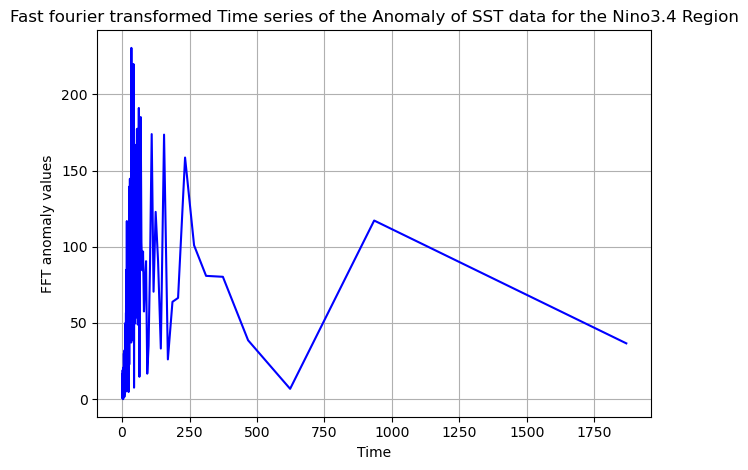

In [136]:
f1=np.fft.fftfreq(1868,d=1)
Y2=np.fft.fft(anomaly)
plt.plot(1/f1[:1868//2],np.abs(Y2[:1868//2]),color='blue',label='FFT_Anomaly_Series of Nino 3.4 Region')
plt.title('Fast fourier transformed Time series of the Anomaly of SST data for the Nino3.4 Region')
plt.xlabel('Time')
plt.ylabel('FFT anomaly values')
#plt.xlim(0,200)
plt.grid(True)
plt.tight_layout()

In [138]:
#g=np.fft.irfft(f1)
#G=np.fft.ifft(Y2)
#print(G)
#print(g)

* ### Inverse Fourier transform of Anomaly:

C:\Users\user\AppData\Local\Temp\ipykernel_2080\295522121.py:1: RuntimeWarning: divide by zero encountered in divide
  plt.plot(1/f1[:1868//2],np.abs(G[:1868//2]),color='red',label='FFT_Anomaly_Series of Nino 3.4 Region')


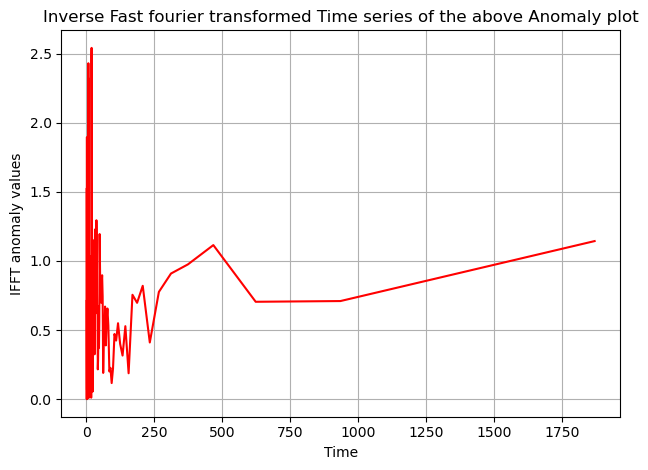

In [137]:
plt.plot(1/f1[:1868//2],np.abs(G[:1868//2]),color='red',label='FFT_Anomaly_Series of Nino 3.4 Region')
#plt.plot(g,np.abs(G[:1868//2]),color='red',label='FFT_Anomaly_Series of Nino 3.4 Region')
plt.title('Inverse Fast fourier transformed Time series of the above Anomaly plot')
plt.xlabel('Time')
plt.ylabel('IFFT anomaly values')
#plt.xlim(0,200)
plt.grid(True)
plt.tight_layout()